In [1]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd

import os
#sys.path.insert(0, os.getcwd()) 
import sys
sys.path.append('../')

from Utils import mnist_processor
from Utils import VAE, encoder_setup, decoder_setup
from Utils import run_knn_classifier, run_mlp_classifier, ssl_mlp, ssl_knn
from Utils import plot_orig_recon_imgs
from Utils import init_classifier_dataset, init_hists

In [2]:
# Main parameter
IMG_PER_CLASS=10

In [3]:
x_train, y_train, x_test, y_test=mnist_processor(keras.datasets.mnist)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# PARAMETERS
ndim=28

In [5]:
indices=np.load('digits_random_indices.npy')

In [6]:
x_train_classifier_initial, y_train_classifier_initial, x_test_classifier, y_test_classifier, indices=init_classifier_dataset(None, x_train, y_train, x_test, y_test,
                                                                                                          IMG_PER_CLASS, indices)
mask = np.ones(len(x_train), dtype=bool)
mask[indices.flatten()] = False
x_train_unlabeled=x_train[mask].copy()
x_train_unlabeled=x_train_unlabeled[::-1]

[[59331 55030 53857 58015 54368 57186 52305 55402 56397 58510]
 [54210 50477 51033 52317 59958 50652 50855 58056 57740 52078]
 [52224 56493 50381 58409 59855 59675 54326 55525 55559 53390]
 [59408 55881 57227 52432 54767 52022 58379 57856 53241 52751]
 [59407 52457 50835 50844 54769 54007 50889 56331 51270 54447]
 [52947 59064 56898 55349 50959 52452 57128 51254 56036 58790]
 [58770 53230 55512 52100 59907 51507 57514 53220 53331 52957]
 [56028 57365 51429 58099 54364 56017 50943 57286 52008 56346]
 [59636 50996 51160 53653 50762 57513 57411 59838 55741 52980]
 [59058 55347 56618 56166 51185 58616 50845 54592 52770 57545]]
(100, 28, 28, 1)


In [7]:
K=5
                                                                                                        
unlabeled_batch=500
x_train_classifier, y_train_classifier=x_train_classifier_initial.copy(), y_train_classifier_initial.copy()
hist_clf_train_classifier_f1, hist_clf_train_f1, hist_clf_test_f1=init_hists(run_knn_classifier, K, x_train_classifier, y_train_classifier, x_train, y_train.argmax(1), x_test_classifier, y_test_classifier)

while(True):
    
    if len(x_train_unlabeled) > 0:
        y_pseudo=ssl_knn(K, x_train_classifier, y_train_classifier, x_train_unlabeled[:unlabeled_batch])
        x_train_classifier=np.concatenate([x_train_classifier, x_train_unlabeled[:unlabeled_batch]], axis=0)
        y_train_classifier=np.concatenate([y_train_classifier, y_pseudo])
        x_train_unlabeled = x_train_unlabeled[unlabeled_batch:]
        print(f"{unlabeled_batch} pseudo-labeled images added to train dataset")
        print(f"{len(x_train_unlabeled)} images remained unlabeled")
    else:
        break
        
    clf_train_classifier_f1, clf_train_f1, clf_test_f1=run_knn_classifier(K, x_train_classifier, y_train_classifier,
                                                                            x_train, y_train.argmax(1),
                                                                            x_test_classifier, y_test_classifier)
    
    train_size=x_train_classifier.shape[0]
    print("Train dataset size=", train_size)
    print(f"Classifier Train F1-score {(clf_train_classifier_f1):.3e}")
    print(f"Train F1-score= {(clf_train_f1):.3e}")
    print(f"Test F1-score= {(clf_test_f1):.3e}")
    print("-------------------------------------")
    hist_clf_train_classifier_f1.append(clf_train_classifier_f1)
    hist_clf_train_f1.append(clf_train_f1)
    hist_clf_test_f1.append(clf_test_f1)

Classifier Train F1-score 8.190e-01
Train F1-score= 6.876e-01
Test F1-score= 6.935e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
59400 images remained unlabeled
Train dataset size= 600
Classifier Train F1-score 8.773e-01
Train F1-score= 7.291e-01
Test F1-score= 7.255e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
58900 images remained unlabeled
Train dataset size= 1100
Classifier Train F1-score 9.037e-01
Train F1-score= 7.476e-01
Test F1-score= 7.465e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
58400 images remained unlabeled
Train dataset size= 1600
Classifier Train F1-score 9.171e-01
Train F1-score= 7.593e-01
Test F1-score= 7.620e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
57900 images remained unlabeled
Train dataset size= 2100
Classifier Train F1-score 9.194e-01
Train F1-score= 7.685e-01
Test F1-score= 

500 pseudo-labeled images added to train dataset
41900 images remained unlabeled
Train dataset size= 18100
Classifier Train F1-score 9.592e-01
Train F1-score= 8.088e-01
Test F1-score= 8.181e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
41400 images remained unlabeled
Train dataset size= 18600
Classifier Train F1-score 9.593e-01
Train F1-score= 8.089e-01
Test F1-score= 8.192e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
40900 images remained unlabeled
Train dataset size= 19100
Classifier Train F1-score 9.595e-01
Train F1-score= 8.090e-01
Test F1-score= 8.189e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
40400 images remained unlabeled
Train dataset size= 19600
Classifier Train F1-score 9.599e-01
Train F1-score= 8.090e-01
Test F1-score= 8.191e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
39900 images remained u

Train dataset size= 35600
Classifier Train F1-score 9.650e-01
Train F1-score= 8.146e-01
Test F1-score= 8.281e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
23900 images remained unlabeled
Train dataset size= 36100
Classifier Train F1-score 9.654e-01
Train F1-score= 8.147e-01
Test F1-score= 8.281e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
23400 images remained unlabeled
Train dataset size= 36600
Classifier Train F1-score 9.652e-01
Train F1-score= 8.149e-01
Test F1-score= 8.285e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
22900 images remained unlabeled
Train dataset size= 37100
Classifier Train F1-score 9.653e-01
Train F1-score= 8.149e-01
Test F1-score= 8.289e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
22400 images remained unlabeled
Train dataset size= 37600
Classifier Train F1-score 9.656e-01
Train F1-s

500 pseudo-labeled images added to train dataset
6400 images remained unlabeled
Train dataset size= 53600
Classifier Train F1-score 9.694e-01
Train F1-score= 8.178e-01
Test F1-score= 8.310e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
5900 images remained unlabeled
Train dataset size= 54100
Classifier Train F1-score 9.695e-01
Train F1-score= 8.179e-01
Test F1-score= 8.315e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
5400 images remained unlabeled
Train dataset size= 54600
Classifier Train F1-score 9.697e-01
Train F1-score= 8.179e-01
Test F1-score= 8.318e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
4900 images remained unlabeled
Train dataset size= 55100
Classifier Train F1-score 9.697e-01
Train F1-score= 8.180e-01
Test F1-score= 8.321e-01
-------------------------------------
500 pseudo-labeled images added to train dataset
4400 images remained unlabe

In [8]:
init_data=["Initial", hist_clf_train_f1[0], hist_clf_test_f1[0]]
last_data=["Last", hist_clf_train_f1[-1], hist_clf_test_f1[-1]]
df=pd.DataFrame([init_data, last_data], columns=["Data", "Train", "Test"])

In [9]:
df

,Data,Train,Test
0,Initial,0.687558,0.693508
1,Last,0.819112,0.833604


In [10]:
df.to_csv("self_training_KNN_without_VAE.csv", index=False)

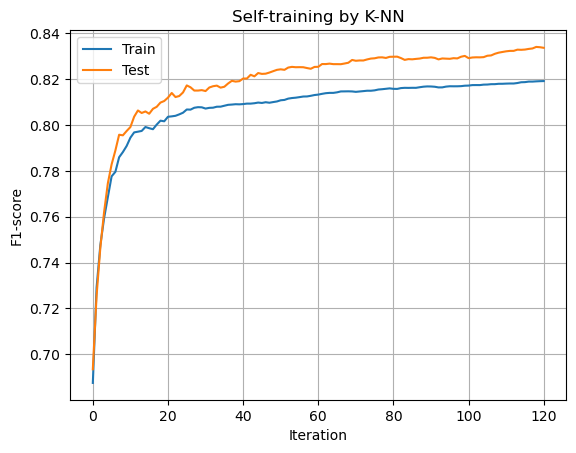

In [11]:
plt.plot(hist_clf_train_f1, label="Train")
plt.plot(hist_clf_test_f1, label="Test")

plt.xlabel("Iteration")
plt.ylabel("F1-score")
plt.title(f"Self-training by K-NN")
plt.legend()
plt.grid()
plt.show()

In [16]:
np.savez("history_KNN_without_VAE.npz", hist_clf_train_f1=hist_clf_train_f1, hist_clf_test_f1=hist_clf_test_f1)